In [1]:
import sys
# comment out this line in your own work by just including a '#' at the beginning 
sys.path.insert(1, '..\\Software\\Library_Files')
# use this line in your own files.  Just delete the '#' at the beginning
# sys.path.insert(1, '.\\Software\\Library_Files')
import PhasePlotter as PP
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2.1 - Separable Equations

So as we've seen, for problems of the form 

$$
\frac{dy}{dt} = f(t,y)
$$

if we have that $f(t,y)=p(t)q(y)$, then we can separate variables so that 

$$
\frac{dy}{q(y)} = p(t)dt
$$

integrate (hopefully) and then move on with our lives.  The book makes this... a bit more complicated because they are trying to set things up for exact equations in 2.6.  They really want you to look at these problems in the form 

$$
\frac{1}{q(y)}\frac{dy}{dt} - p(t) = 0
$$

and then let 

$$
\frac{1}{q(y)} = \frac{dH_{2}}{dy}, ~ p(t) = \frac{dH_{1}}{dt},
$$

so that the solution lives on the *level curves*

$$
H_{2}(y) - H_{1}(t) = C
$$

Note, if we use the chain rule, we see that 

\begin{align*}
\frac{d}{dt}\left(H_{2}(y) - H_{1}(t)\right) & = 0\\
\frac{d H_{2}}{dy} \frac{dy}{dt} - \frac{d H_{1}}{dt}  & = 0\\
\end{align*}

**Problem**: For 

$$
\frac{dy}{dx} = \frac{4x-x^{3}}{4+y^{3}}
$$

solve using separation of variables.  Find $H_{2}(y)$ and $H_{1}(x)$.

So, if we write this in the appropriate way, we find that 

$$
\left(4+y^{3}\right)\frac{dy}{dx} - \left(4x-x^{3}\right) = 0
$$

so here we find 

$$
\frac{dH_{1}}{dx} = 4x - x^{3}, ~ \frac{dH_{2}(y)}{dy} = 4+y^{3}
$$

so $H_{1}(x) = 2x^{2}-x^{4}/4$ and $H_{2}(y) = 4y + y^{4}/4$ and so our solution is found via the level curves of 

$$
4y + \frac{y^{4}}{4} - \left(2x^{2} - \frac{x^{4}}{4} \right) = C.
$$

Okay, so there is no ready way to solve for $y$ in terms of $x$ to get a solution $y(x)$.  Thus, instead of an *explicit* solution, we get an *implicit* one.  So how do we get an idea of what solutions look like?  

The easiest way is to look at the affiliated function 

$$
F(x,y) = 4y + \frac{y^{4}}{4} - \left(2x^{2} - \frac{x^{4}}{4} \right)
$$

and use NumPy to generate contour plots.  Let me show you what I mean.  

Text(0, 0.5, '$y$')

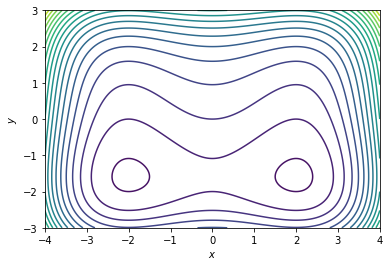

In [2]:
x = np.linspace(-4., 4., 1001)
y = np.linspace(-3., 3., 1001)
xx, yy = np.meshgrid(x,y)
fvals = 4.*yy + .25*yy**4. - 2.*xx**2. + .25*xx**4.
plt.contour(xx, yy, fvals, 20)
plt.xlabel("$x$")
plt.ylabel("$y$")

Every possible solution is given by one of the curves.  I know, it's weird, but that's the way it is.  

## Section 2.2 - Linear Equations and Integrating Factors

So we are now going to see how to solve any first order, linear, inhomogeneous initival value problem of the form 

$$
\frac{dy}{dx} + p(x)y = q(x), ~ y(x_{0}) = y_{0}
$$

Note, could also write the differential equation as 

$$
 \mathcal{L}y = q, ~ \mathcal{L}y = \frac{dy}{dx} + p(x)y.
$$

As we discussed, we think of $q(x)$ as an *input* or input signal even and that makes $y(x)$ an *output* or output signal.  So if you want a picture in your mind, this is not a bad one to think of 

![](input_output.png)

So how are we going to solve this?  Well guess why the first short assignment had integrals in an exponential coupled with using the Fundamental Theorem of Calculus?  To solve this problem, we introduce what is called an *integrating factor*, which in this case is given by the function

$$
P(x) = e^{\int_{x_{0}}^{x}p(s)ds}
$$

**Problem**: Find $\frac{dP}{dx}=?$

**Problem**: If we multiply the original equation by $P(x)$ we have

$$
\frac{dy}{dx}P(x) + p(x)P(x)y = q(x)P(x).
$$

Show that this can be written as 

$$
\frac{d}{dx}\left( y(x)P(x) \right) = q(x)P(x).
$$

**Problem**: Integrating both sides, show that we have the solution 

$$
y(x) = \frac{y(x_{0})}{P(x)} + \frac{1}{P(x)}\int_{x_{0}}^{x} q(s)P(s) ds, ~ P(x) = e^{\int_{x_{0}}^{x}p(s)ds}
$$

>Note, you'll also see this written out the long way so that 
$$
y(x) = y(x_{0})e^{-\int_{x_{0}}^{x}p(s)ds} + e^{-\int_{x_{0}}^{x}p(s)ds}\int_{x_{0}}^{x}q(s)e^{\int_{x_{0}}^{s}p(t)dt}ds
$$
Either way, there is no nice way to memorize this, so you're just gonna have to learn the proof.  I promise, it's easier to learn than it looks at first (but yes, it scared the snot out of me the first time I saw it).

**Problem**: Newton's Law of Cooling with Periodic Forcing.  So Newton's Law of Cooling describes the relaxtion of a temperature $T(t)$ to some equilibrium temperature $T_{eq}$, happening at a rate $k$.  This is described via the differential equation

$$
\frac{dT}{dt} = -k(T - T_{eq}), ~ T(0) = T_{0}.
$$

Okay, fine.  But as we know, most things on the surface of the Earth get hotter and colder due to the periodic cycling of the Sun.  So a more realistic model for anything which the Sun might touch (say a plant... my plants don't get any good light in my place) would be 

$$
\frac{dT}{dt} = -k(T - T_{eq}) + A\cos(\omega t), ~ T(0) = T_{0}.
$$

So okay, how would we solve this monster?  There are a couple of ways to come at this, but let's do the most straightforward thing and rewrite our problem as 

$$
\frac{dT}{dt} + kT = kT_{eq} + A\cos(\omega t), ~ T(0) = T_{0}.
$$


Now, this is in the form of the class of equations we just figured out how to solve.  We just need to identify $p(t)$ and $q(t)$.  Here we find

$$
p(t) = k, ~ q(t) = kT_{eq} + A\cos(\omega t).
$$

I now recommend you find the integrating factor $P(t) = e^{\int_{0}^{t} k ds} = e^{kt}$.  Now, if you insist, you can use the formula from above, but I promise, it's honestly easier to remember we multiply by $P(t)$ and the left-hand side turns into a derivative.  What I mean is, you get this 

$$
\frac{d}{dt}\left(T e^{kt} \right) = \left(kT_{eq} + A\cos(\omega t) \right)e^{kt}
$$

and then we integrate... which you'll watch me do on the doc cam... and then we get to 

$$
T(t) = T_{0}e^{-kt} + T_{eq}\left(1-e^{-kt}\right) + \frac{A}{k^{2}+\omega^{2}}\left(k\left(\cos(\omega t) - e^{-kt}\right)  + \omega \sin(\omega t)\right)
$$


Note, as $t\rightarrow \infty$ we see that 

\begin{align*}
T(t) \rightarrow & T_{eq} + \frac{A}{k^{2}+\omega^{2}}\left(k \cos(\omega t)  + \omega \sin(\omega t)\right)\\
\rightarrow & T_{eq} + \frac{A}{\sqrt{k^{2}+\omega^{2}}}\cos(\omega t - \varphi), ~ \cos(\varphi) = \frac{k}{\sqrt{k^{2}+\omega^{2}}}, ~ \sin(\varphi) = \frac{\omega}{\sqrt{k^{2}+\omega^{2}}}\\
\end{align*}

So that $T(t)$ oscillates around the equilibrium temperature due to the forcing.  The initial temperature basically gets forgotten exponentially fast.  That said, the parameters $k$ and $\omega$ (both of which are related to time), influence the amplitude of the fluctuation and likewise they induce a phase shift relative to the temperature forcing term.  Thus while fluctuations around $T_{eq}$ happen at the same frequency $\omega$ of the forcing, they always lag behind the forcing (that's what the phase term $\varphi$ means)  Note, this example is presented in the book without the description, though perhaps this bumps us over into Section 2.3 (shrug).  

**Problem**: Solve the initial value problem 

$$
ty' + 2y = 4t^{2}, ~ y(1) = 2
$$